In [1]:
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def Geometric_Slerp(P0,P1,r,cant_puntos):

    omega = math.acos((P0[0]*P1[0]+P0[1]*P1[1]+P0[2]*P1[2])/(r*r)) #La fórmula falla cuando los puntos son los extremos de un diametro

    x_geo = [P0[0]*np.sin(omega*(1-t))/np.sin(omega)+P1[0]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    y_geo = [P0[1]*np.sin(omega*(1-t))/np.sin(omega)+P1[1]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    z_geo = [P0[2]*np.sin(omega*(1-t))/np.sin(omega)+P1[2]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    return x_geo,y_geo,z_geo

In [3]:
def cross(a, b):
    c = [a[1]*b[2] - a[2]*b[1],
         a[2]*b[0] - a[0]*b[2],
         a[0]*b[1] - a[1]*b[0]]

    return c

In [4]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

In [5]:
from scipy.optimize import fsolve
import math

def equations(p):
    x, y, z = p

    return (In_rot[0]*x + In_rot[1]*y + In_rot[2]*z - np.cos(theta_cap),\
            normal_vector[0]*x + normal_vector[1]*y + normal_vector[2]*z,\
           x*x+y*y+z*z-1)

In [6]:

def color_triangle(x, y, z, V0, V1, V2):
    
    Centroid = [V0[0]+V1[0]+V2[0],V0[1]+V1[1]+V2[1],V0[2]+V1[2]+V2[2]]
   
    x_cons_0 = V0[1]*V1[2] - V0[2]*V1[1]
    y_cons_0 = V0[2]*V1[0] - V0[0]*V1[2]
    z_cons_0 = V0[0]*V1[1] - V0[1]*V1[0]
    
    if Centroid[0]*x_cons_0+Centroid[1]*y_cons_0+Centroid[2]*z_cons_0<0:
        x_cons_0 = -x_cons_0
        y_cons_0 = -y_cons_0
        z_cons_0 = -z_cons_0
    
    x_cons_1 = V2[1]*V1[2] - V2[2]*V1[1]
    y_cons_1 = V2[2]*V1[0] - V2[0]*V1[2]
    z_cons_1 = V2[0]*V1[1] - V2[1]*V1[0]
    
    if Centroid[0]*x_cons_1+Centroid[1]*y_cons_1+Centroid[2]*z_cons_1<0:
        x_cons_1 = -x_cons_1
        y_cons_1 = -y_cons_1
        z_cons_1 = -z_cons_1
    
    x_cons_2 = V0[1]*V2[2] - V0[2]*V2[1]
    y_cons_2 = V0[2]*V2[0] - V0[0]*V2[2]
    z_cons_2 = V0[0]*V2[1] - V0[1]*V2[0]
    
    if Centroid[0]*x_cons_2+Centroid[1]*y_cons_2+Centroid[2]*z_cons_2<0:
        x_cons_2 = -x_cons_2
        y_cons_2 = -y_cons_2
        z_cons_2 = -z_cons_2
    
    total = np.sign(x_cons_1*x + y_cons_1*y + z_cons_1*z) + np.sign(x_cons_2*x + y_cons_2*y + z_cons_2*z) + np.sign(x_cons_0*x + y_cons_0*y + z_cons_0*z)
   
    total[total < 3] = 0
    
    return total/3


In [7]:
phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

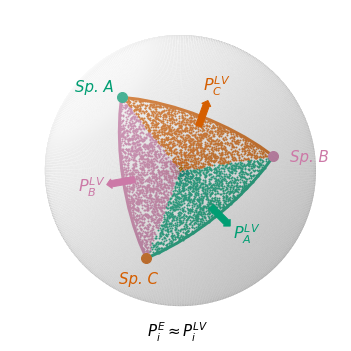

In [9]:
import pandas
from matplotlib.colors import LightSource

light = LightSource(90, 45)

rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball


phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Vertices
V0 = [1, 0, 0]
V1 = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2 = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

# Incenter
In = [0.7486381, 0.4706336, 0.4669529]


# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Plot unit-ball
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 10)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 10)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 10)

# Plot simulated points
df = pandas.read_csv('../Results/simulations/random_feasible_growth_rates_3x3_symmetric.csv')

for i in range(5000):
    
    point_i = [df['r_1'][i],df['r_2'][i],df['r_3'][i]]
    point_i_rot = np.dot(rotation_matrix(axis, theta), point_i)
    point_i_rot = point_i_rot.tolist()
    
    if df['LV_first_sp_excluded'][i] == 'sp_1':
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#D55E00", marker='o', markersize = 1)
        
    elif df['LV_first_sp_excluded'][i] == 'sp_2':
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#CC79A7", marker='o', markersize = 1)
        
    else:
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#009E73", marker='o', markersize = 1)

# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)
#ax.plot(x_cap2.tolist(), y_cap2.tolist(), z_cap2.tolist(), '-.', color="k", linewidth = 2)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.text2D(0.20, 0.75, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.33, 0.18, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.837, 0.54, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.67, 0.31, r"$P_A^{LV}$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.58, 0.75, r"$P_C^{LV}$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.21,0.45, r"$P_B^{LV}$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.415,0.02, r"$P_i^E\approx P_i^{LV}$",style='italic', size=15, transform=ax.transAxes)


ax.text2D(
    0.63,0.38, "                  ", ha="center", va="center", rotation=-45, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)

ax.text2D(
    0.58, .68, "                  ", ha="center", va="center", rotation=70, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
    0.34,0.48, "                   ", ha="center", va="center", rotation=190, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CC79A7", ec="#CC79A7", lw=1),transform=ax.transAxes)

LightSource(azdeg=30)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()

fig.savefig('../Images/figS5a.PNG', format='PNG', dpi=300)
plt.show()

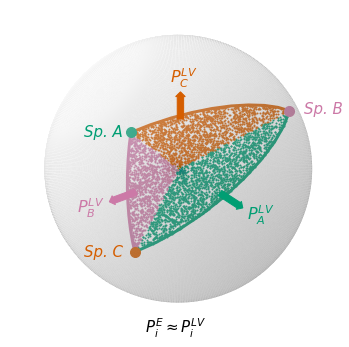

In [8]:
import pandas

rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Vertices
V0 = [1,0,0]
V1 = [-0.2000000, 0.9797959,0]
V2 = [0.624241438623307, 0.33879841108016295, 0.703944786860394]


# Incenter
In = [0.7417953, 0.5677937, 0.3568614]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Plot unit-ball
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)


# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 10)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 10)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 10)


# ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], c="k", marker='s', markersize = 10)

# Plot simulated points
df = pandas.read_csv('../Results/simulations/random_feasible_growth_rates_3x3_asymmetric.csv')

for i in range(5000):
    
    point_i = [df['r_1'][i],df['r_2'][i],df['r_3'][i]]
    point_i_rot = np.dot(rotation_matrix(axis, theta), point_i)
    point_i_rot = point_i_rot.tolist()
    
    if df['LV_first_sp_excluded'][i] == 'sp_1':
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#D55E00", marker='o', markersize = 1)
        
    elif df['LV_first_sp_excluded'][i] == 'sp_2':
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#CC79A7", marker='o', markersize = 1)
        
    else:
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#009E73", marker='o', markersize = 1)
        
# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.text2D(0.23, 0.61, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.23, 0.25, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.89, 0.68, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.72, 0.36, r"$P_A^{LV}$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.49, 0.77, r"$P_C^{LV}$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.21,0.38, r"$P_B^{LV}$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.415,0.02, r"$P_i^E\approx P_i^{LV}$",style='italic', size=15, transform=ax.transAxes)


ax.text2D(
    0.67,0.42, "                  ", ha="center", va="center", rotation=-33, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)

ax.text2D(
    0.52, .7, "                  ", ha="center", va="center", rotation=90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
    0.35,0.43, "                   ", ha="center", va="center", rotation=200, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CC79A7", ec="#CC79A7", lw=1),transform=ax.transAxes)



ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()

fig.savefig('../Images/figS5b.PNG', format='PNG', dpi=300)
plt.show()